In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model

import numpy as np
import pandas as pd
import os

import random
from collections import deque
import matplotlib.pylab as plt

from sklearn.decomposition import PCA

Using TensorFlow backend.


# Imports of classes

In [2]:
from environment import ETFEnvironment, CryptoEnvironment
from agent import MinVarianceAgent, MaxSharpeAgent, MaxDecorrelationAgent, MaxReturnsAgent
from utils import *

In [3]:
N_ASSETS = 65 # 53
WINDOW_FIT = 180 # 252
WINDOW_HOLD = 90 # 252
env = CryptoEnvironment() # ETFEnvironment

# Reweighting process: Autoencoder

In [4]:
from agent import AutoencoderAgent

In [5]:
agent_ae = AutoencoderAgent(N_ASSETS, allow_short=False, encoding_dim = 10)

In [6]:
actions_equal, actions_ae = [], []
result_equal, result_ae = [], []

for i in range(WINDOW_FIT, len(env.data), WINDOW_HOLD):
    
    state = env.get_state(i, WINDOW_FIT, is_cov_matrix=False, is_raw_time_series=True)
    
    action_equal = np.ones(N_ASSETS) / N_ASSETS
    action_ae = agent_ae.act(state)

    state_action = env.get_state(i+WINDOW_HOLD, WINDOW_HOLD, is_cov_matrix=False)
    
    r = np.dot(state_action, action_equal)
    result_equal.append(r.tolist())
    actions_equal.append(action_equal)
    
    r = np.dot(state_action, action_ae)
    result_ae.append(r.tolist())
    actions_ae.append(action_ae)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[0.01605543 0.01600341 0.01593306 0.01238553 0.01521788 0.01604302
 0.01418497 0.01591324 0.01594919 0.01583244 0.01586514 0.01581271
 0.01503155 0.01557791 0.01604384 0.01599951 0.01579127 0.0156248
 0.01484286 0.01594689 0.01574341 0.01599232 0.0110514  0.01598986
 0.         0.01571084 0.01595228 0.01601609 0.01552198 0.01590612
 0.01600864 0.01487548 0.01603305 0.01603728 0.01602504 0.01593705
 0.01601686 0.01600854 0.01594651 0.01573479 0.01592014 0.01603009
 0.01575586 0.01596178 0.01604223 0.01595218 0.0158085  0.01314184
 0.01599038 0.01606735 0.01583924 0.01548868 0.01602756 0.01606089
 0.01337222 0.01606076 0.01608538 0.01610775 0.01607228 0.01584196
 0.0160167  0.01600794 0.01598066 0.01590139 0.01590403]
[0.01598222 0.01654609 0.01634352 0.01591606 0.01416287 0.01623235
 0.01493131 0.01542828 0.0165205  0.01627899 0.01602905 0.01642353
 0.01632561 0.016246

[0.01575501 0.01615973 0.01560129 0.01476591 0.01585659 0.01503129
 0.01454584 0.01587259 0.01582193 0.014801   0.01619212 0.01612257
 0.01599789 0.01604976 0.0162169  0.01558489 0.01520243 0.0156863
 0.01520196 0.01571992 0.01497879 0.01610373 0.01526609 0.0152839
 0.         0.01533851 0.01507106 0.01426332 0.01543412 0.01582045
 0.01539462 0.01565621 0.01612365 0.01584008 0.01609504 0.01607796
 0.01625258 0.01625814 0.015295   0.01436416 0.01616116 0.01601044
 0.01588689 0.01617396 0.01616864 0.01603075 0.01485693 0.01613705
 0.0159108  0.01608307 0.01538117 0.01588976 0.01615323 0.01579023
 0.01294048 0.01565279 0.01614476 0.01618203 0.01569665 0.01556694
 0.01610339 0.01550972 0.01551036 0.01503012 0.01592533]
[0.01570348 0.0157724  0.01549857 0.01512184 0.01563492 0.01570849
 0.01568119 0.01558197 0.01572202 0.01563645 0.01570051 0.01586648
 0.01573461 0.01557782 0.01578186 0.0158622  0.0157499  0.01564787
 0.0152409  0.01576475 0.0156666  0.01577244 0.01568419 0.01551532
 0.    

In [1]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_ae_vis = [item for sublist in result_ae for item in sublist]

NameError: name 'result_equal' is not defined

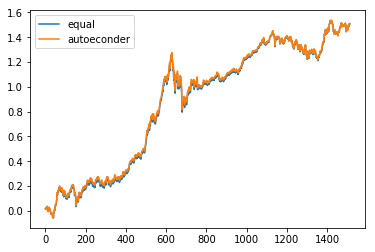

In [9]:
plt.figure()
plt.plot(np.array(result_equal_vis).cumsum(), label='equal')
plt.plot(np.array(result_ae_vis).cumsum(), label='autoeconder')
plt.legend()
plt.show()

In [9]:
print('EQUAL', print_stats(result_equal_vis, result_equal_vis))
print('AUTOENCODER', print_stats(result_ae_vis, result_equal_vis))

EQUAL [0.001, 0.0123, 1.2689, 0.0, 1.0]
AUTOENCODER [0.001, 0.0124, 1.2592, -0.0, 1.0048]


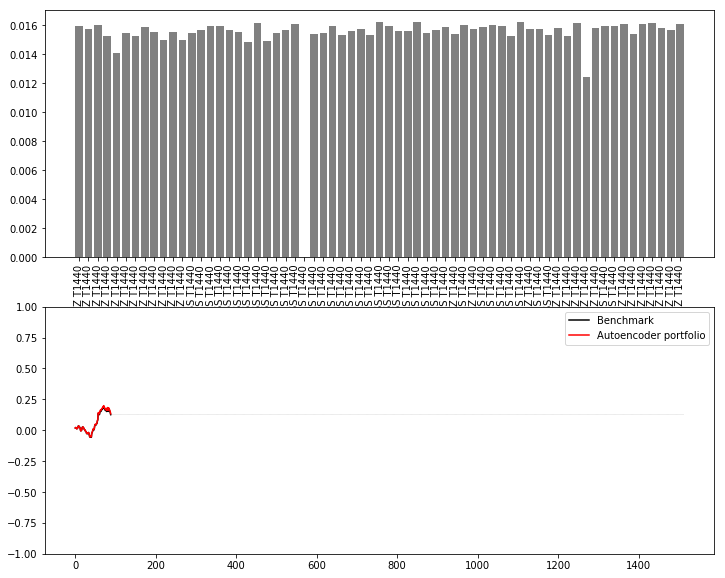

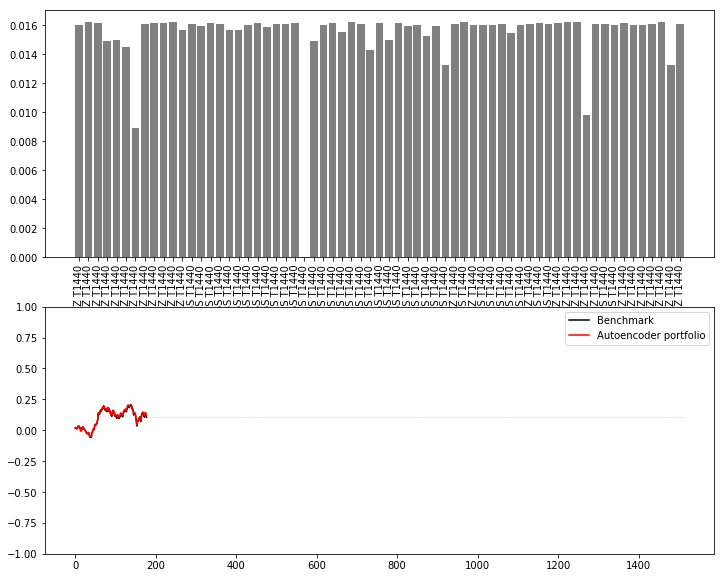

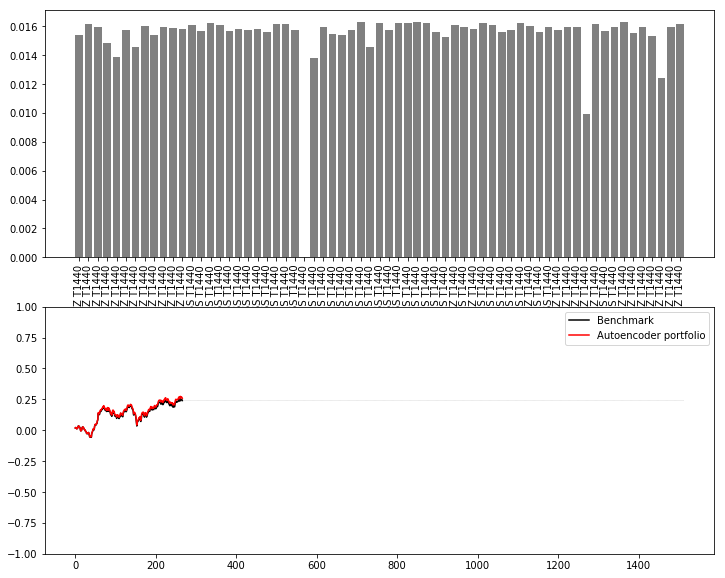

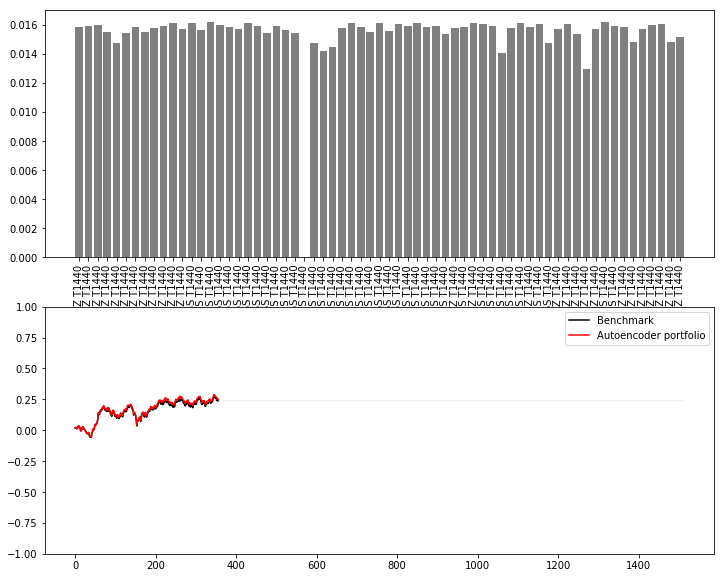

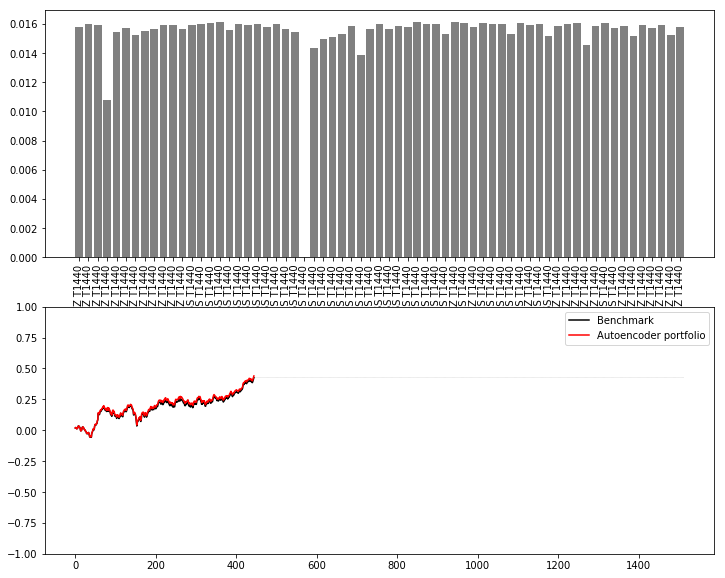

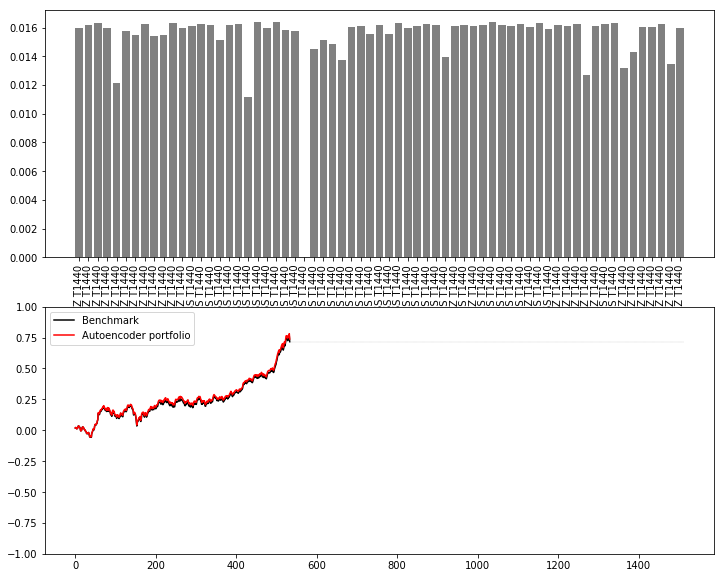

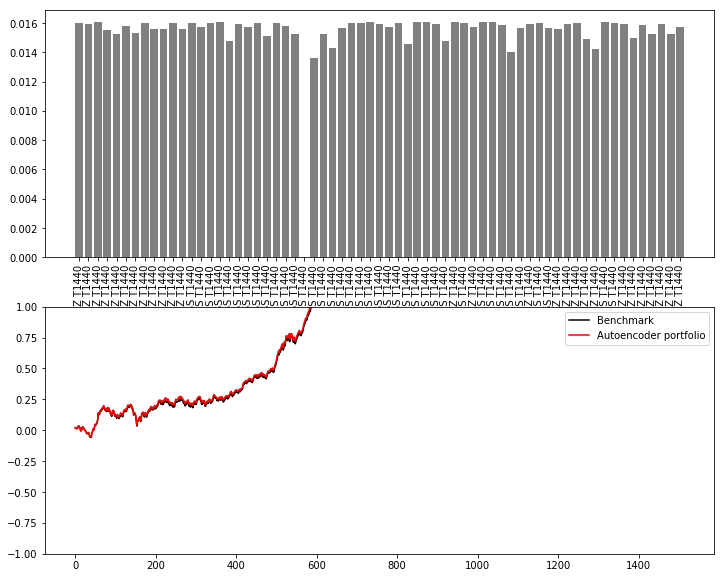

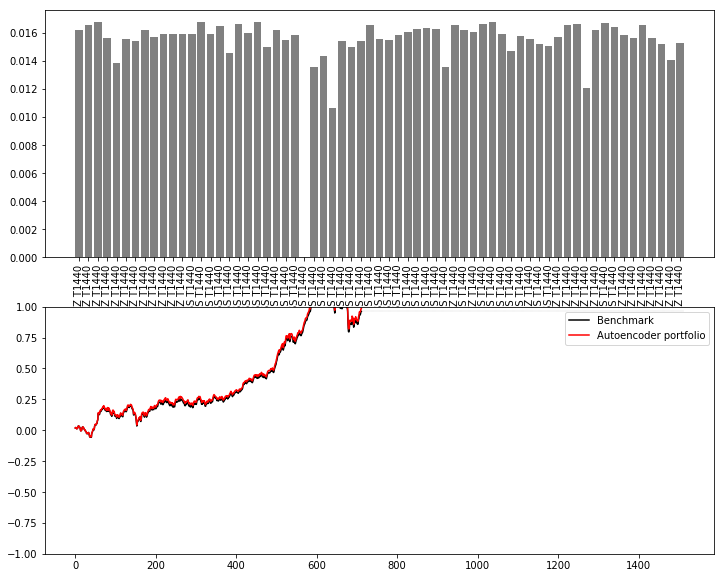

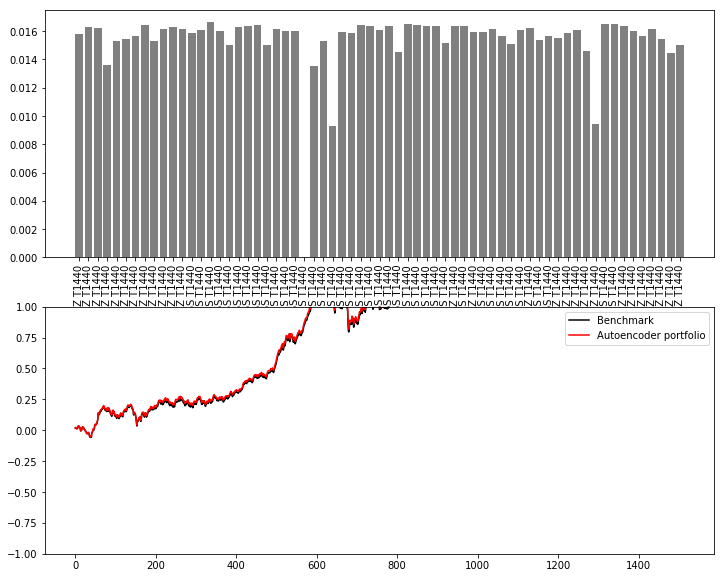

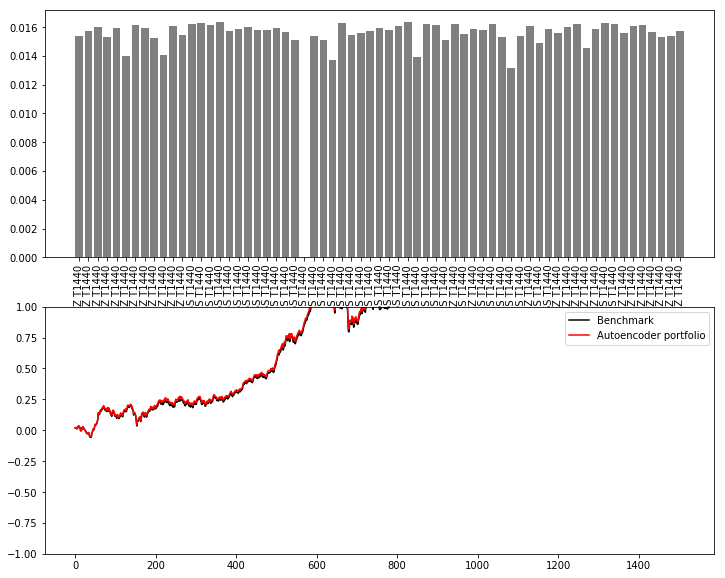

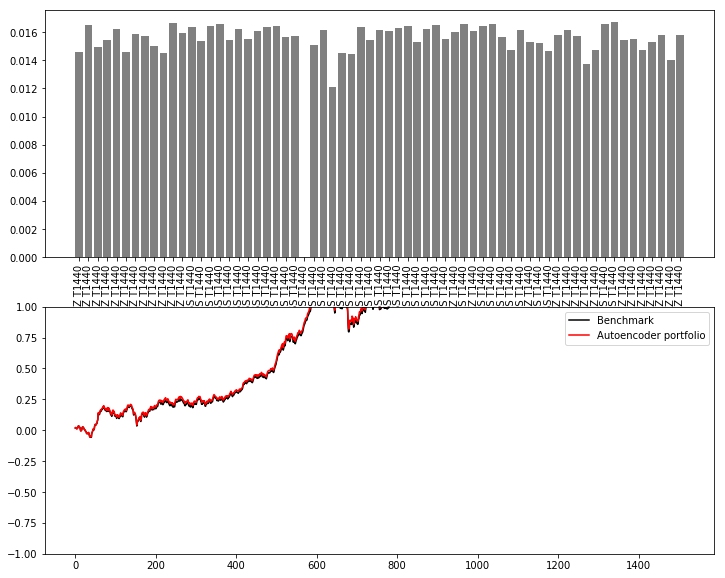

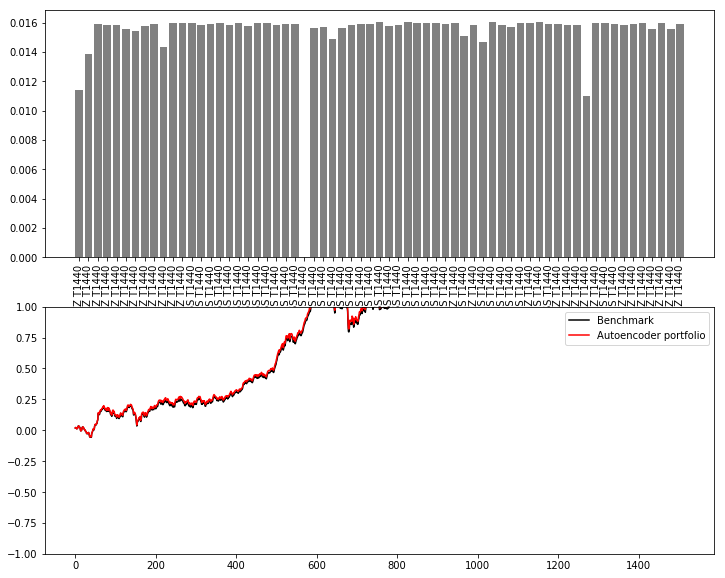

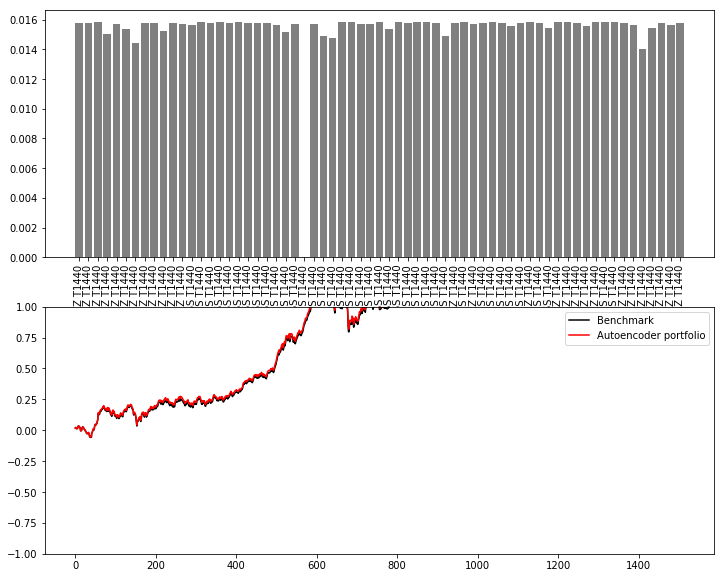

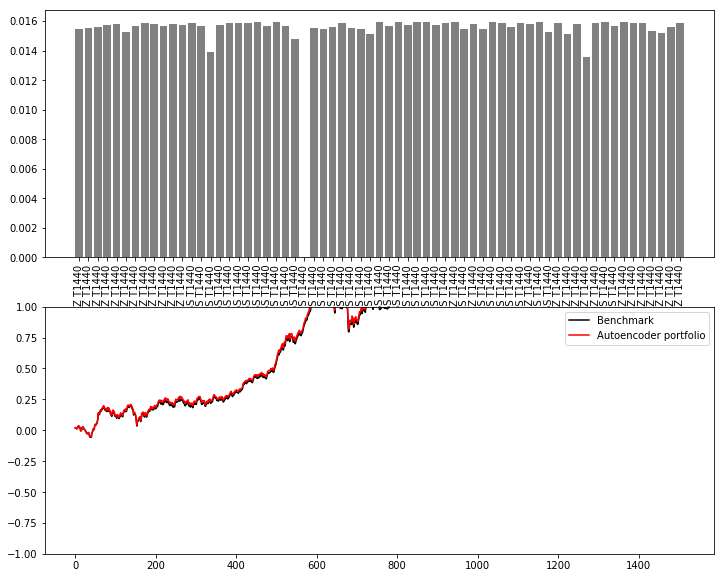

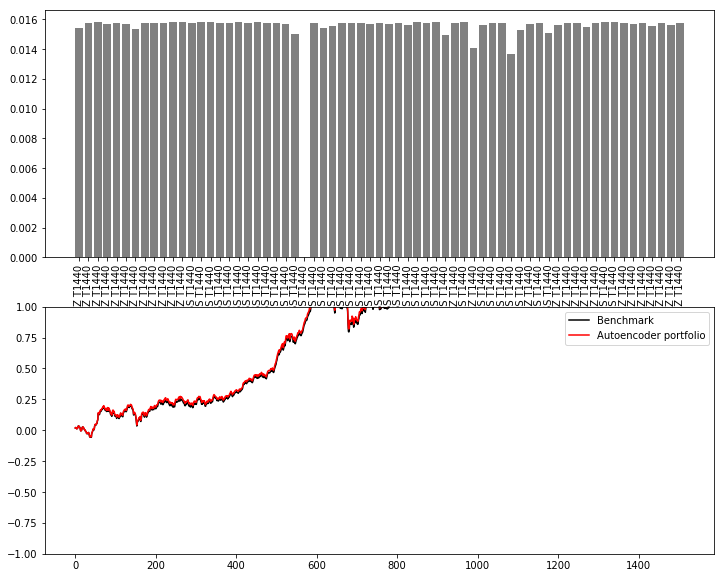

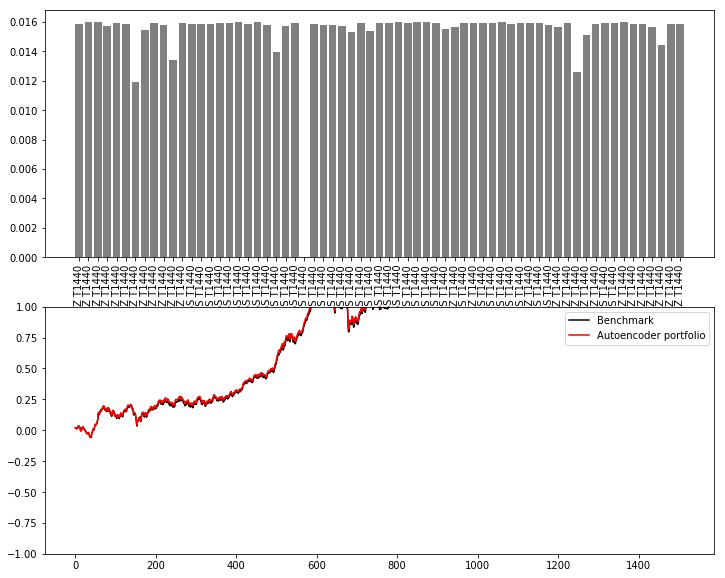

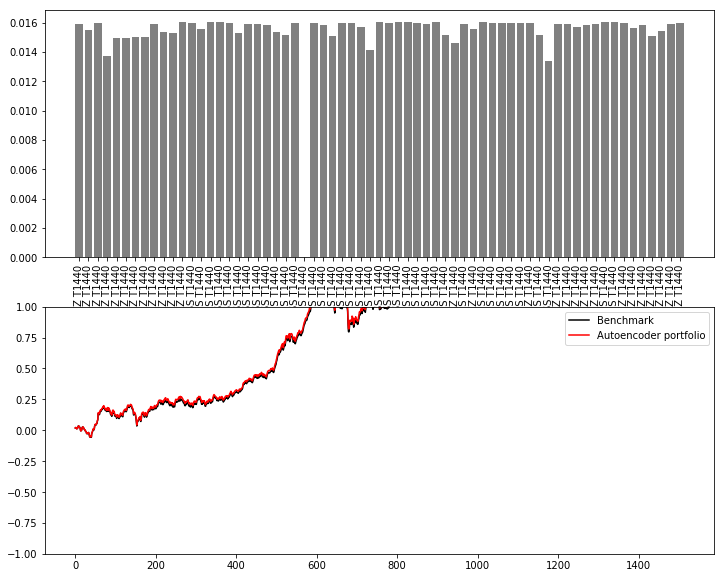

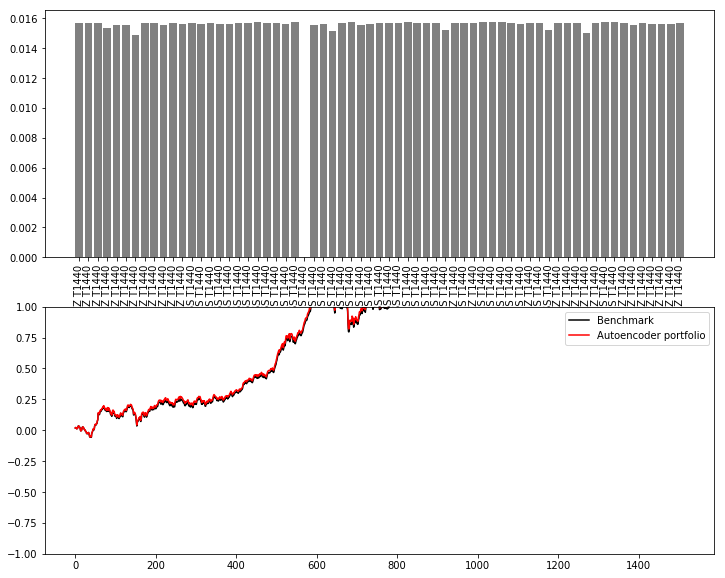

In [10]:
plot_results(result_equal, 
             result_ae, 
             actions_ae, 
             N_ASSETS,
             state.columns, 
             'Autoencoder portfolio', './images/ae/', 'series')

# Making GIFs

In [45]:
import imageio
import glob

In [46]:
name = 'decorr'

In [47]:
filenames = sorted(glob.glob('./images/' + name + '/series*.jpg'))

In [48]:
filenames

['./images/decorr/series0.jpg',
 './images/decorr/series1.jpg',
 './images/decorr/series2.jpg']

In [49]:
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./images/' + name + '_gif.gif', images, duration=0.5)